In [4]:
import nltk

In [5]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install textblob

In [27]:
import tweepy
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# Twitter API credentials
API_KEY = 'J8Tzjq2HOQih0yAdpxKtFRZhB'
API_SECRET_KEY = 'mbTmvSsCG50TMC1ibAi35D1IoZG35w503hCZSEKWpp2mQzg4GA'
#access_key = "1103710624582819840-59rVWMj2lxU3vgQM9j3zkfTf4VzOmY"
#access_secret = "NJMXskbkSfL7XHDSWbqYALBhn8qTqwFzAQMQQkAqoBrE9"

# authenticate Twitter API using credentials
# Authenticate with Twitter API
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET_KEY)

# create tweepy API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [28]:
# define keywords and hashtags to search for
keywords = ["mental health", "mental illness", "depression", "anxiety", "stress", "mental wellness", "selfcare","therapy"] 
            #"counseling", "suicide prevention", "end the stigma", "mental health awareness","mental health matters","mindfulness","recovery", "mental health support"]
hashtags = ["#mentalhealth", "#mentalillness", "#depression", "#anxiety", "#stress", "#mentalwellness", "#selfcare","#therapy"] 
            #"#counseling", "#suicideprevention", "#endthestigma", "#mentalhealthawareness","#mentalhealthmatters","#mindfulness","#recovery", "#mentalhealthsupport"]

# Search query remove retweets from search results
search_words = " OR ".join(keywords + hashtags) + " -filter:retweets"

# preprocess tweet data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenizer = TweetTokenizer()

def clean_tweet(tweet):
    # remove links, special characters, and usernames
    tweet = re.sub(r"http\S+|www\S+|https\S+|\@\w+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    # tokenize and remove stop words
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # stem remaining tokens
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # join stemmed tokens back into sentence
    clean_tweet = ' '.join(stemmed_tokens)
    return clean_tweet

# perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# initialize list to store tweets
tweets_list = []

In [31]:
# collect tweets using Tweepy cursor
for tweet in tweepy.Cursor(api.search_tweets, q=search_words, lang='en', tweet_mode='extended').items(1000):
    # preprocess tweet text
    cleaned_tweet = clean_tweet(tweet.full_text)
    # get sentiment score
    sentiment = get_sentiment(cleaned_tweet)
    # add cleaned tweet and sentiment to list
    tweets_list.append({'Tweet': cleaned_tweet, 'Sentiment': sentiment})

# create dataframe from list of tweets
tweets_df = pd.DataFrame(tweets_list)

# print number of tweets collected
print(f"Number of tweets collected: {len(tweets_df)}")

# print number of tweets by sentiment
print("Number of tweets by sentiment:")
print(tweets_df['Sentiment'].value_counts())


Rate limit reached. Sleeping for: 428


Number of tweets collected: 17695
Number of tweets by sentiment:
negative    10770
positive     6049
neutral       876
Name: Sentiment, dtype: int64


In [33]:
# calculate percentage of tweets by sentiment
sentiment_counts = tweets_df['Sentiment'].value_counts()
percentage_positive = sentiment_counts['positive'] / len(tweets_df) * 100
percentage_neutral = sentiment_counts['neutral'] / len(tweets_df) * 100
percentage_negative = sentiment_counts['negative'] / len(tweets_df) * 100
print("Percentage of tweets by sentiment:")
print(f"Positive: {percentage_positive:.2f}%")
print(f"Neutral: {percentage_neutral:.2f}%")
print(f"Negative: {percentage_negative:.2f}%")

# calculate average sentiment score across all tweets
sentiment_scores = {'positive': 1, 'neutral': 0, 'negative': -1}
tweets_df['Sentiment Score'] = tweets_df['Sentiment'].map(sentiment_scores)
average_sentiment_score = tweets_df['Sentiment Score'].mean()
print(f"Average sentiment score: {average_sentiment_score:.2f}")


Percentage of tweets by sentiment:
Positive: 34.18%
Neutral: 4.95%
Negative: 60.86%
Average sentiment score: -0.27


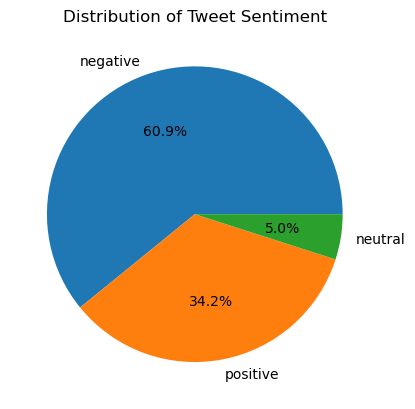

In [34]:
import matplotlib.pyplot as plt

# count the number of tweets by sentiment
sentiment_counts = tweets_df['Sentiment'].value_counts()

# create a pie chart to show the distribution of positive, negative, and neutral tweets
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tweet Sentiment')
plt.show()


In [36]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


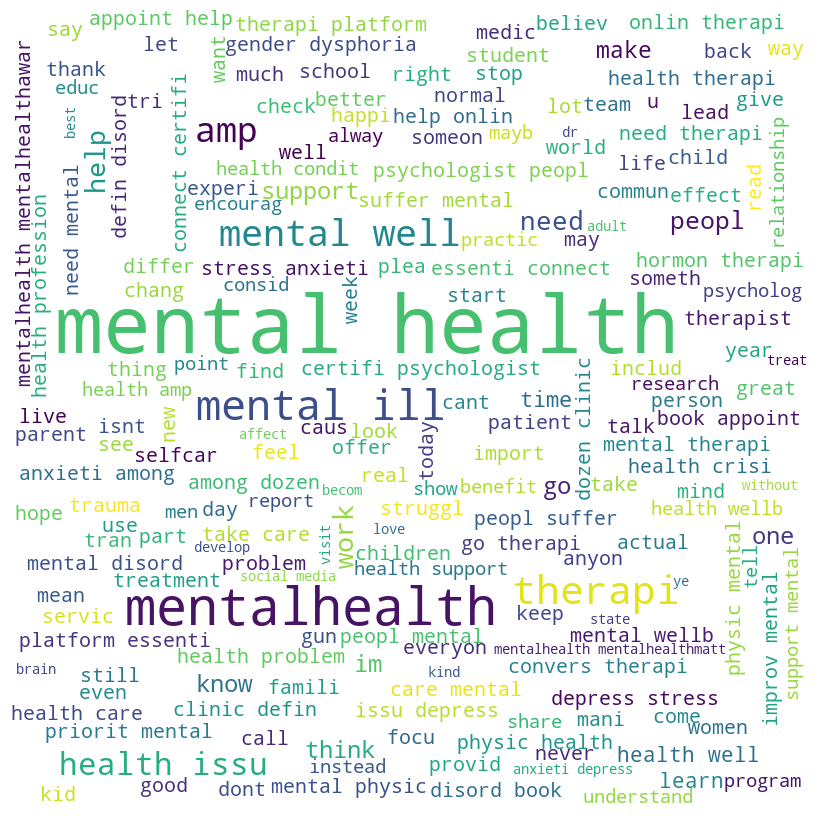

In [37]:
from wordcloud import WordCloud

# combine all tweets into a single string
all_tweets = ' '.join(tweets_df['Tweet'])

# create a word cloud from the tweets
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_tweets)

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
